In [6]:
path = (r"C:\Users\Sourya\Desktop\Ml - Projects\Bank Note authentication\BankNote_Authentication.csv")
## bank note dataset https://www.kaggle.com/ritesaluja/bank-note-authentication-uci-data

In [28]:
import pandas as pd

In [29]:
import numpy as np

In [30]:
df=pd.read_csv(path)

In [31]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [32]:
# spliting the depedent and independent variables
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [33]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [34]:
y.head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
Name: class, dtype: int64

In [35]:
y.unique()

array([0, 1], dtype=int64)

In [36]:
import collections

In [37]:
from collections import Counter

In [38]:
Counter(y)

Counter({0: 762, 1: 610})

In [39]:
class_count = pd.isnull(df["class"])

In [40]:
class_count

0       False
1       False
2       False
3       False
4       False
        ...  
1367    False
1368    False
1369    False
1370    False
1371    False
Name: class, Length: 1372, dtype: bool

In [41]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

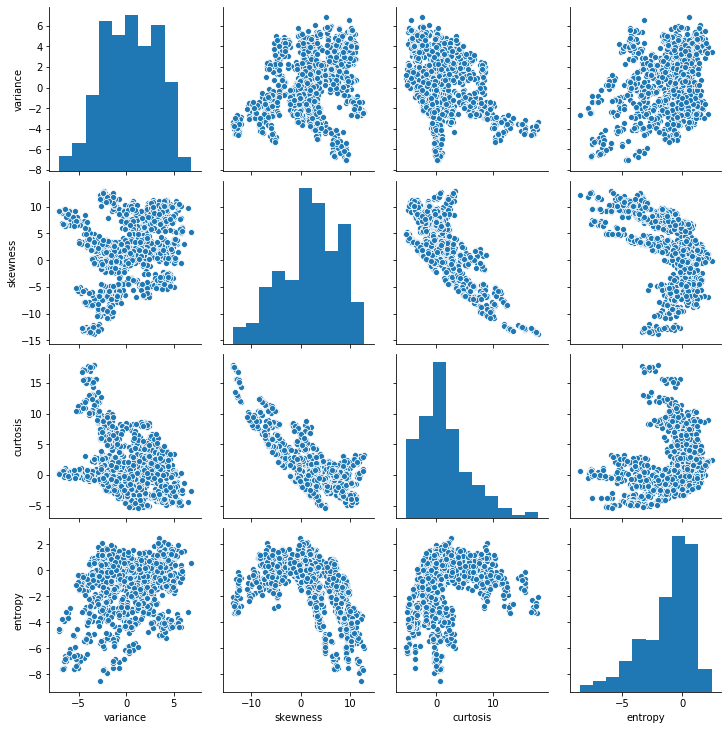

In [42]:
import seaborn as sns
sns.pairplot(X)

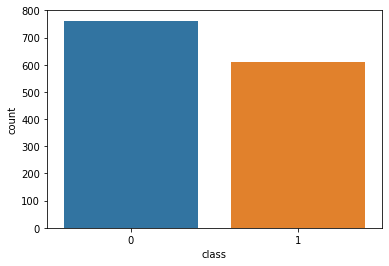

In [53]:
sns.countplot(x=df["class"])

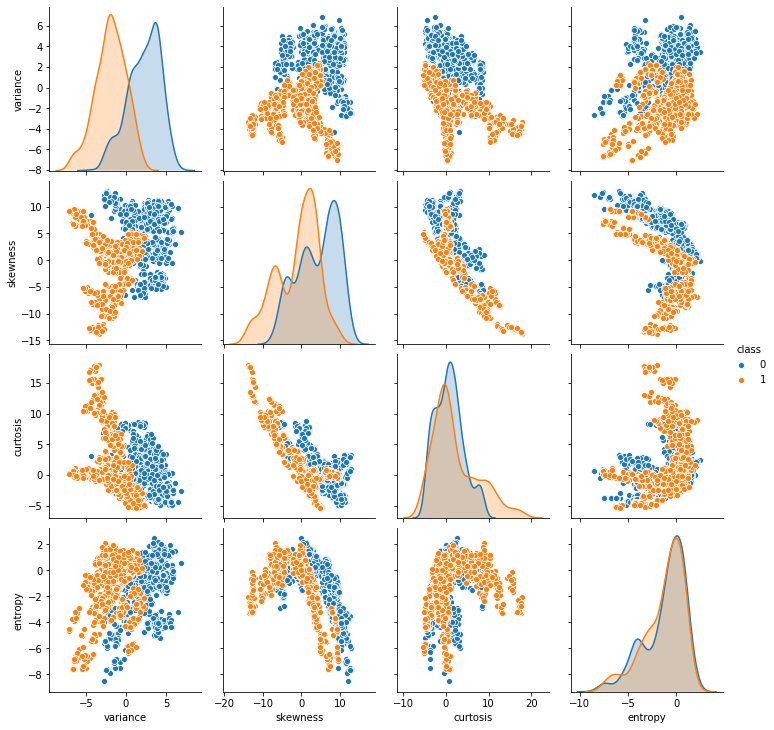

In [54]:
sns.pairplot(df, hue="class")

In [43]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [44]:
print(model.feature_importances_)

[0.5517725  0.2520023  0.14378864 0.05243655]


In [22]:
##Model test and train Split
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(random_state=42)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [56]:
## Prediction
y_pred=classifier.predict(X_test)

In [57]:
### Check Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.9941690962099126

In [58]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("bank-note-1.pkl","wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [59]:
# open a file, where you ant to store the data
file = open('Bank-Note auth.pkl', 'wb')

# dump information to that file
pickle.dump(classifier, file)

In [60]:
classifier.predict([[8,3,4,1]])

array([0], dtype=int64)